<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Linear Regression and Train/Test Split

---

# Introduction

We've discussed overfitting in the context of bias and variance, and we've touched on some techniques that are used to avoid overfitting (but haven't practiced them yet). In this project, we'll practice a fundamental method for avoiding overfitting that is commonly referred to as: _train/test split validation_. 

This is similar to something called "cross-validation" — in fact, it is a type of cross-validation — in that we will be splitting the data into two subsets:
* A subset on which to train our model.
* A subset on which to test our model's predictions.

This serves two useful purposes:
* We prevent overfitting by not using all of the data.
* We have some remaining data we can use to evaluate our model.

While this may seem like a relatively simple idea, **there are some caveats** to putting it into practice. For example, if you are not careful, it is easy to take a non-random split. Suppose we have salary data on technical professionals that is composed of 80 percent data from California, 20 percent data from elsewhere, and is sorted by state. If we split our data into 80 percent training data and 20 percent testing data, we might inadvertantly select all the California data to train and all the non-California data to test. In this case, we've still overfit on our data set because we did not sufficiently randomize the data.

Note: In a situation like this, you could use a technique called _k-fold cross-validation_, which is cross-validation applied to more than two subsets. In particular, in k-fold cross-validation, you'd partition your data into $k$ subsets and train on $k-1$ one of them, holding the last slice for testing. You would do this for each of the possible $k-1$ subsets.

# Project Requirements

The goal of this project will be to create a test-training split to compare multiple models on the same Boston housing data set. For example, you might choose to compare different linear models on the same data.

In this project, you'll fit two to three different models on the Boston housing data. For example, you could pick two different subsets of variables, one or more polynomial models, or any other model you'd like. 

### Here's What We Will Be Doing:

* Work with Boston housing data to predict the value of a home
* Create a test-train split of the data.
* Train your model on the training data.
* Evaluate your model on the test data.
* Repeat with other variables.
* Rank the models by how well they score on the testing data set. 
* Don't forget to interpret your findings! 



A k-fold cross-validation creates a hold portion of your data set for each iteration of training and validating:

![](http://i.imgur.com/0PFrPXJ.png)

## Linear Regression

As a real estate developer, you are being asked to model the median home price of various houses in the city of Boston using data from the US census. Your goal is to predict a continuous, numeric output (price) based on a combination of discrete features that you choose.

In [7]:
import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])

print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/Users/fooyoh/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California hous

### REQUIRED: Clean Up Data and Perform Exporatory Data Analysis

Boston data is from scikit-learn, so it _ought_ to be pretty clean, but you should always perform exploratory data analysis.

In [9]:
# Exploratory data analysis.

# Include: total nulls, index, data types, shape, summary statistics, and the number of unique values for each column


#### Data Summary

In [10]:
# Shape of X, y
print(f"X: {X.shape}")
print(f"y: {y.shape}")

X: (506, 13)
y: (506, 1)


In [11]:
# Combine X and y tentatively for EDA purposes
boston_data = pd.concat([X, y], axis=1)
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
# Summary of data
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


There are no null values in any of the columns.

In [13]:
# Summary statistics of data
boston_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


1. Note the values for ZN (proportion of residential land zoned for lots over 25,000 sq.ft.) being 0 for at least 50% of the data.

1. CHAS (Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)) being a categorical variable does not have useful statistics.

1. As RAD (index of accessibility to radial highways) is a value on an index, we need to be careful on how it is being interpreted.

In [14]:
# Number of unique values for each independent variable
boston_data.drop(["MEDV"], axis=1).nunique().sort_values()

CHAS         2
RAD          9
ZN          26
PTRATIO     46
TAX         66
INDUS       76
NOX         81
AGE        356
B          357
DIS        412
RM         446
LSTAT      455
CRIM       504
dtype: int64

Re-emphasises that CHAS is a categorical variable.

#### Distribution of data

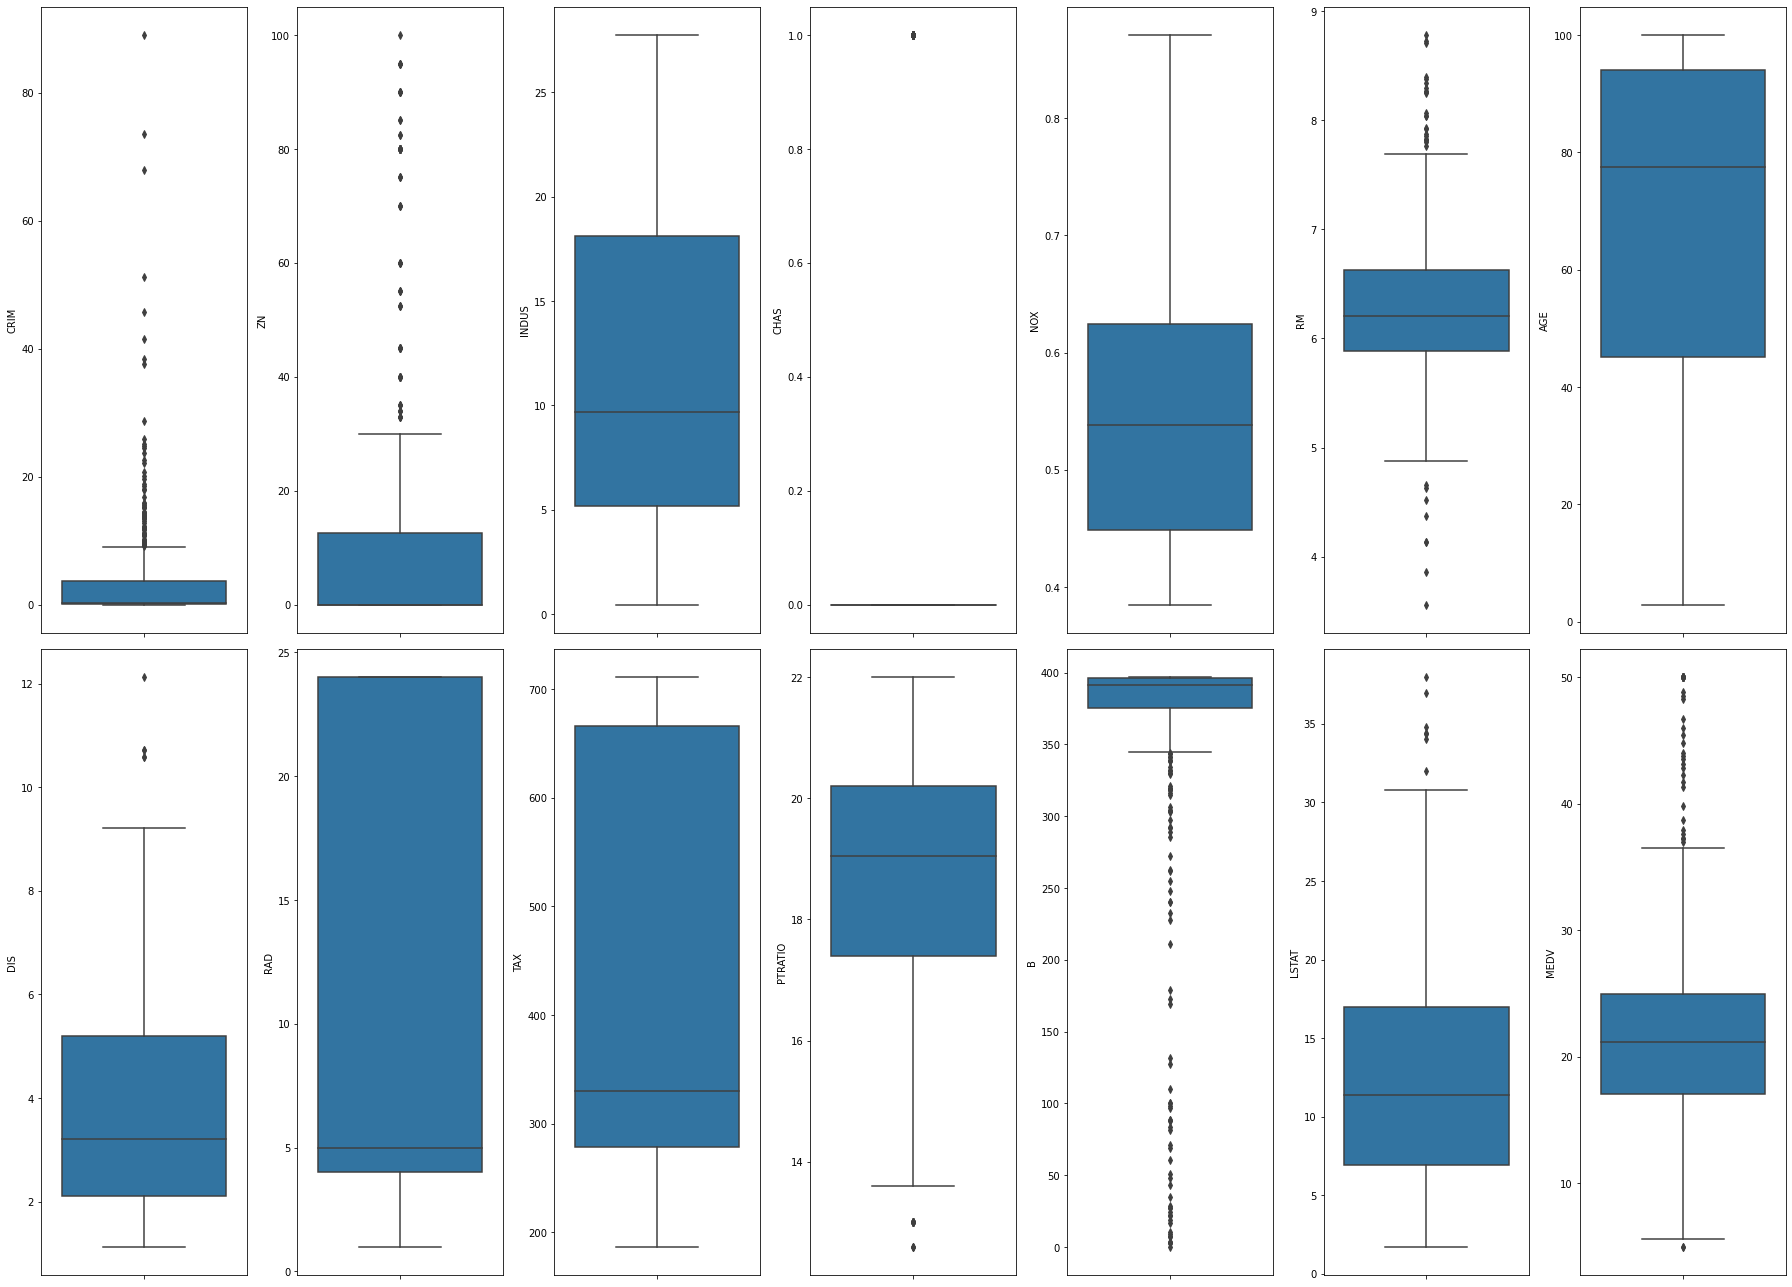

In [15]:
import seaborn as sns

fig, axs = plt.subplots(2, 7, figsize=(25,18))
index = 0
axs = axs.flatten()
for col, data in boston_data.items():
    sns.boxplot(y=col, data=boston_data, ax=axs[index])
    index += 1
plt.tight_layout()

1. CRIM, ZN, RM, B, MEDV have relatively larger numbers of outlier.
1. Take note of them if they are selected for a model.

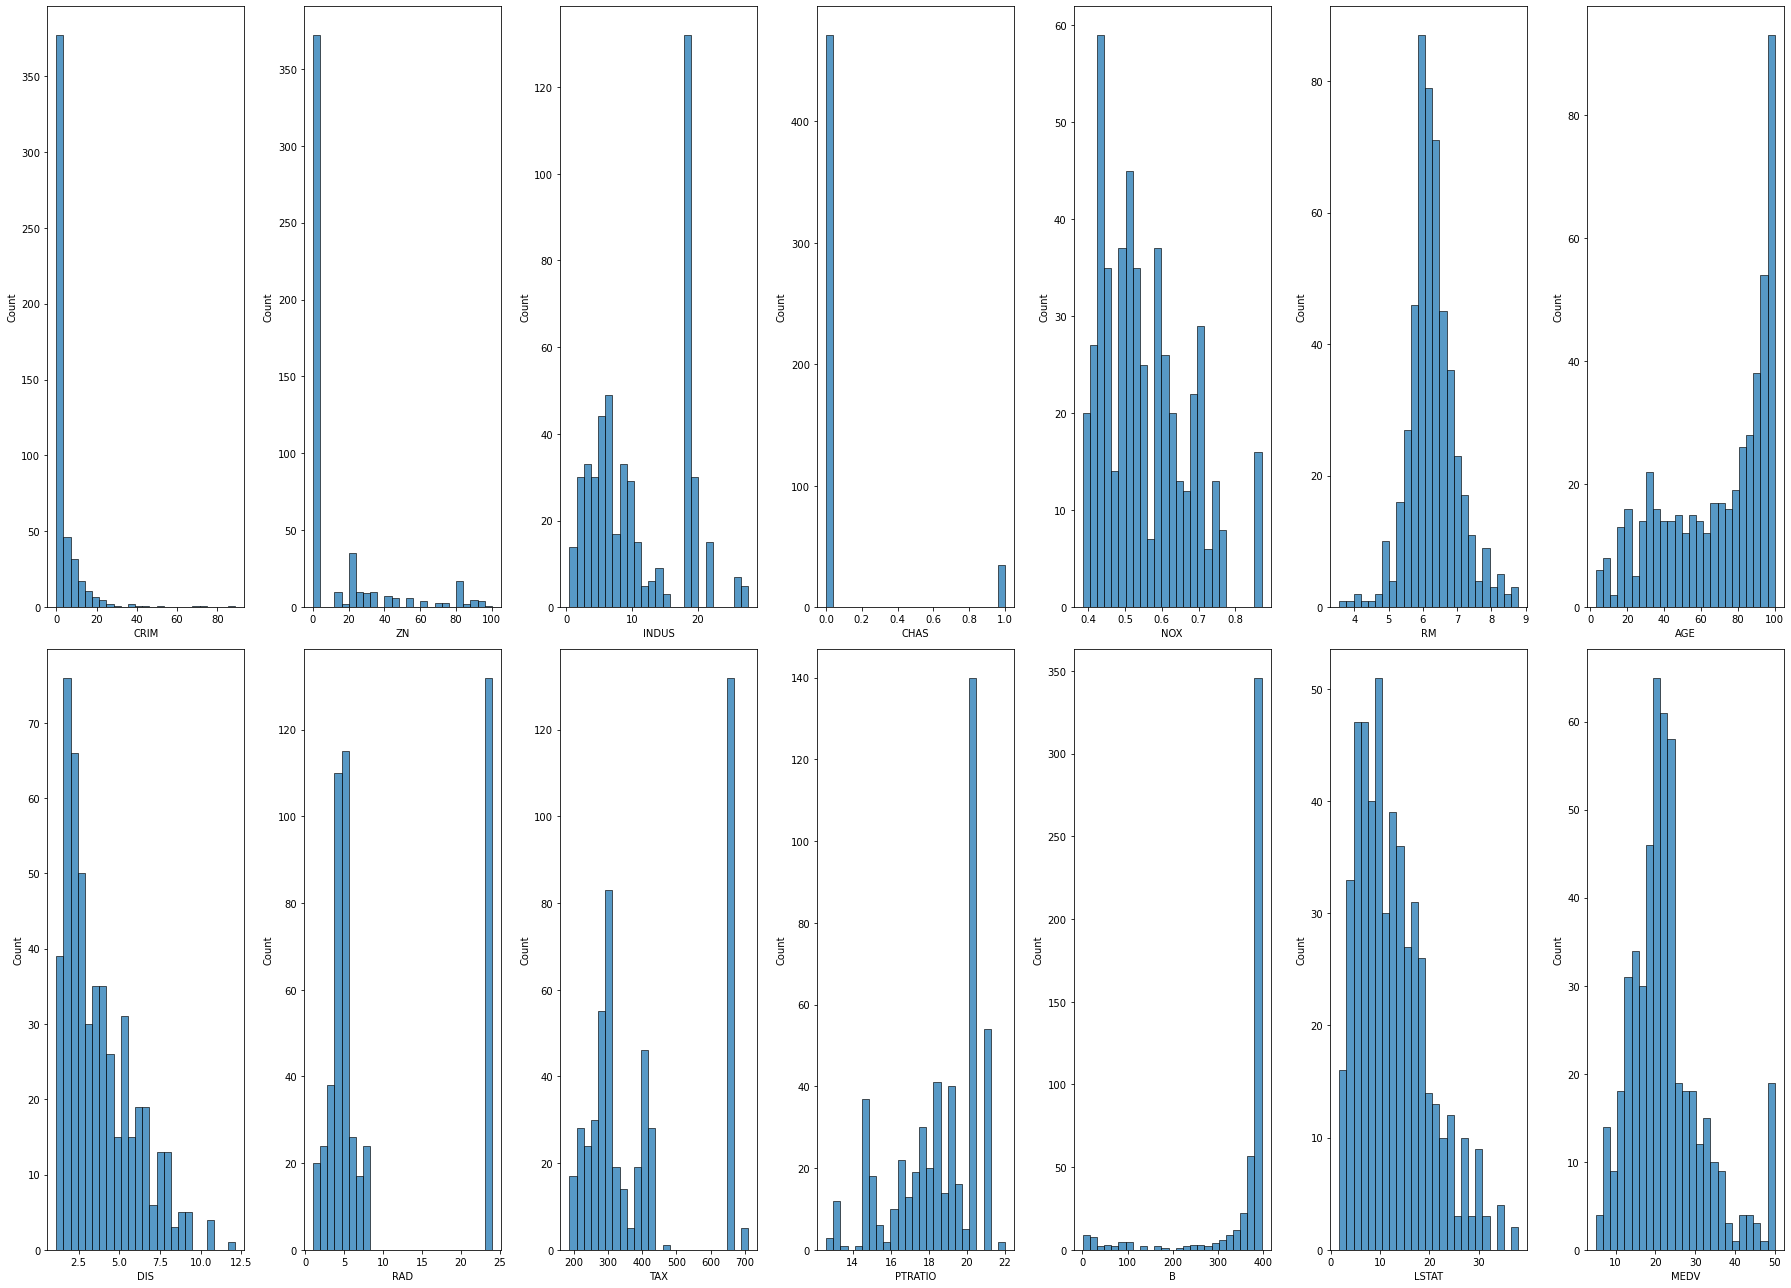

In [16]:
fig, axs = plt.subplots(2, 7, figsize=(25,18))
index = 0
axs = axs.flatten()
for col, data in boston_data.items():
    sns.histplot(data=boston_data, x=col, ax=axs[index], bins=25)
    index += 1
plt.tight_layout()

1. RM and MEDV are close to a normal distribution.
1. CRIM, ZN, NOX, DIS, LSTAT are more right-skewed.
1. AGE, PTRATIO, B are more left-skewed.
1. INDUS, RAD, TAX exhibit some form of bi-modal.
1. Nothing useful can be concluded with CHAS since it is a categorical variable.

#### Correlation

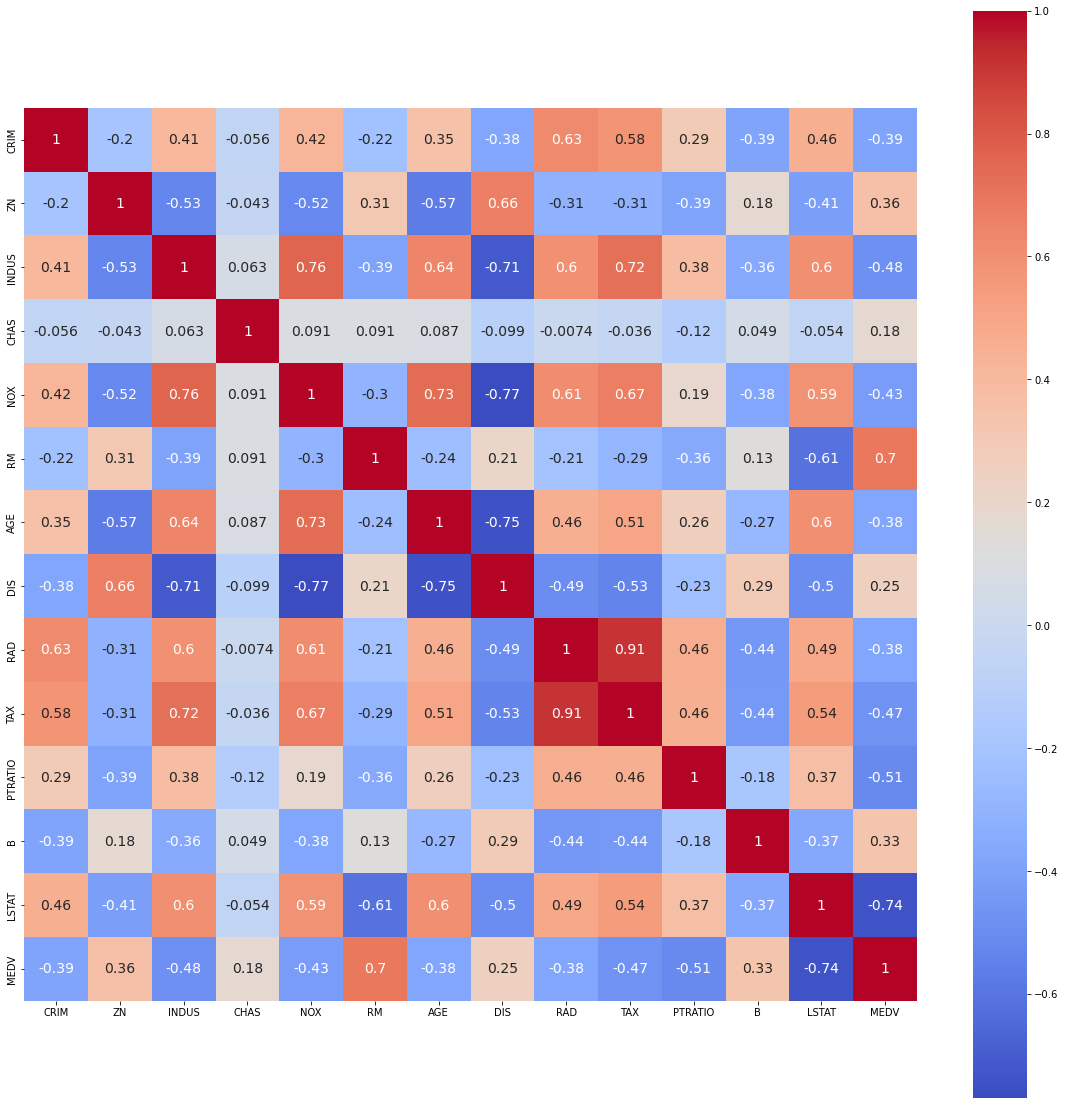

In [17]:
# Correlation matrix
plt.subplots(figsize=(20,20))
sns.heatmap(boston_data.corr(), annot=True, square=True, cmap='coolwarm', annot_kws={'size':14});

1. Strong posititve correlation with MEDV: RM(0.7)
1. Positive correlation with MEDV: ZN(0.36), DIS(0.25), B(0.33)

1. Strong negative correlation with MEDV: LSTAT(-0.74), PTRATIO(-0.51)
1. Negative correaltion with MEDV: INDUS(-0.48), TAX(-0.47), NOX(-0.43), CRIM(-0.39), AGE(-0.38), RAD(-0.38)

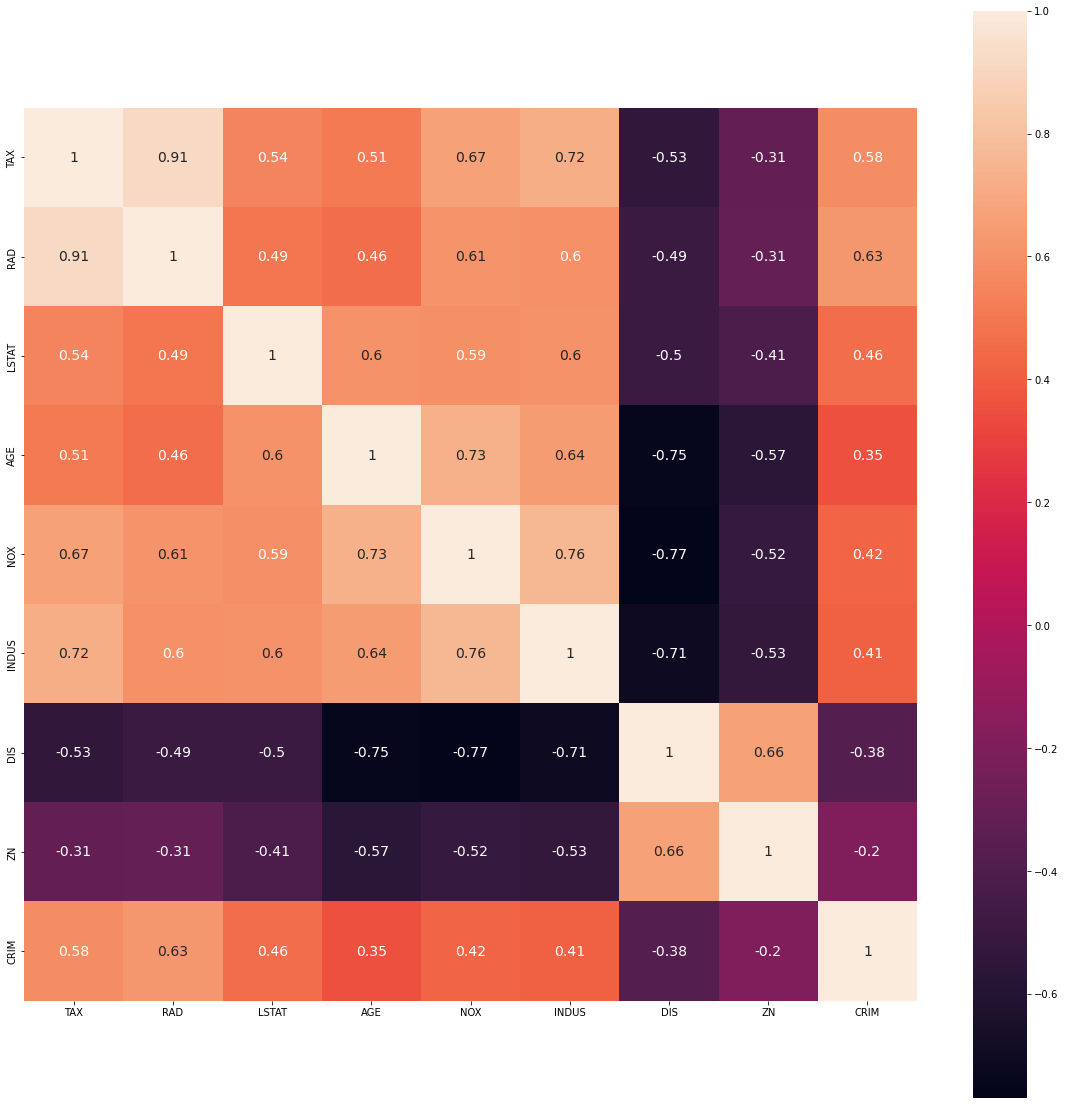

In [18]:
# Check for possible multicollinearity
plt.subplots(figsize=(20,20))
possible_multicollinearity = boston_data[['TAX', 'RAD', 'LSTAT', 'AGE', 'NOX', 'INDUS', 'DIS', 'ZN', 'CRIM']].corr()
sns.heatmap(possible_multicollinearity,annot=True, square=True, annot_kws={'size':14} );

Note that DIS exhibit relatively higher correlation with INDUS, NOX, AGE. RAD and TAX has the highest correlation amongst these variables.

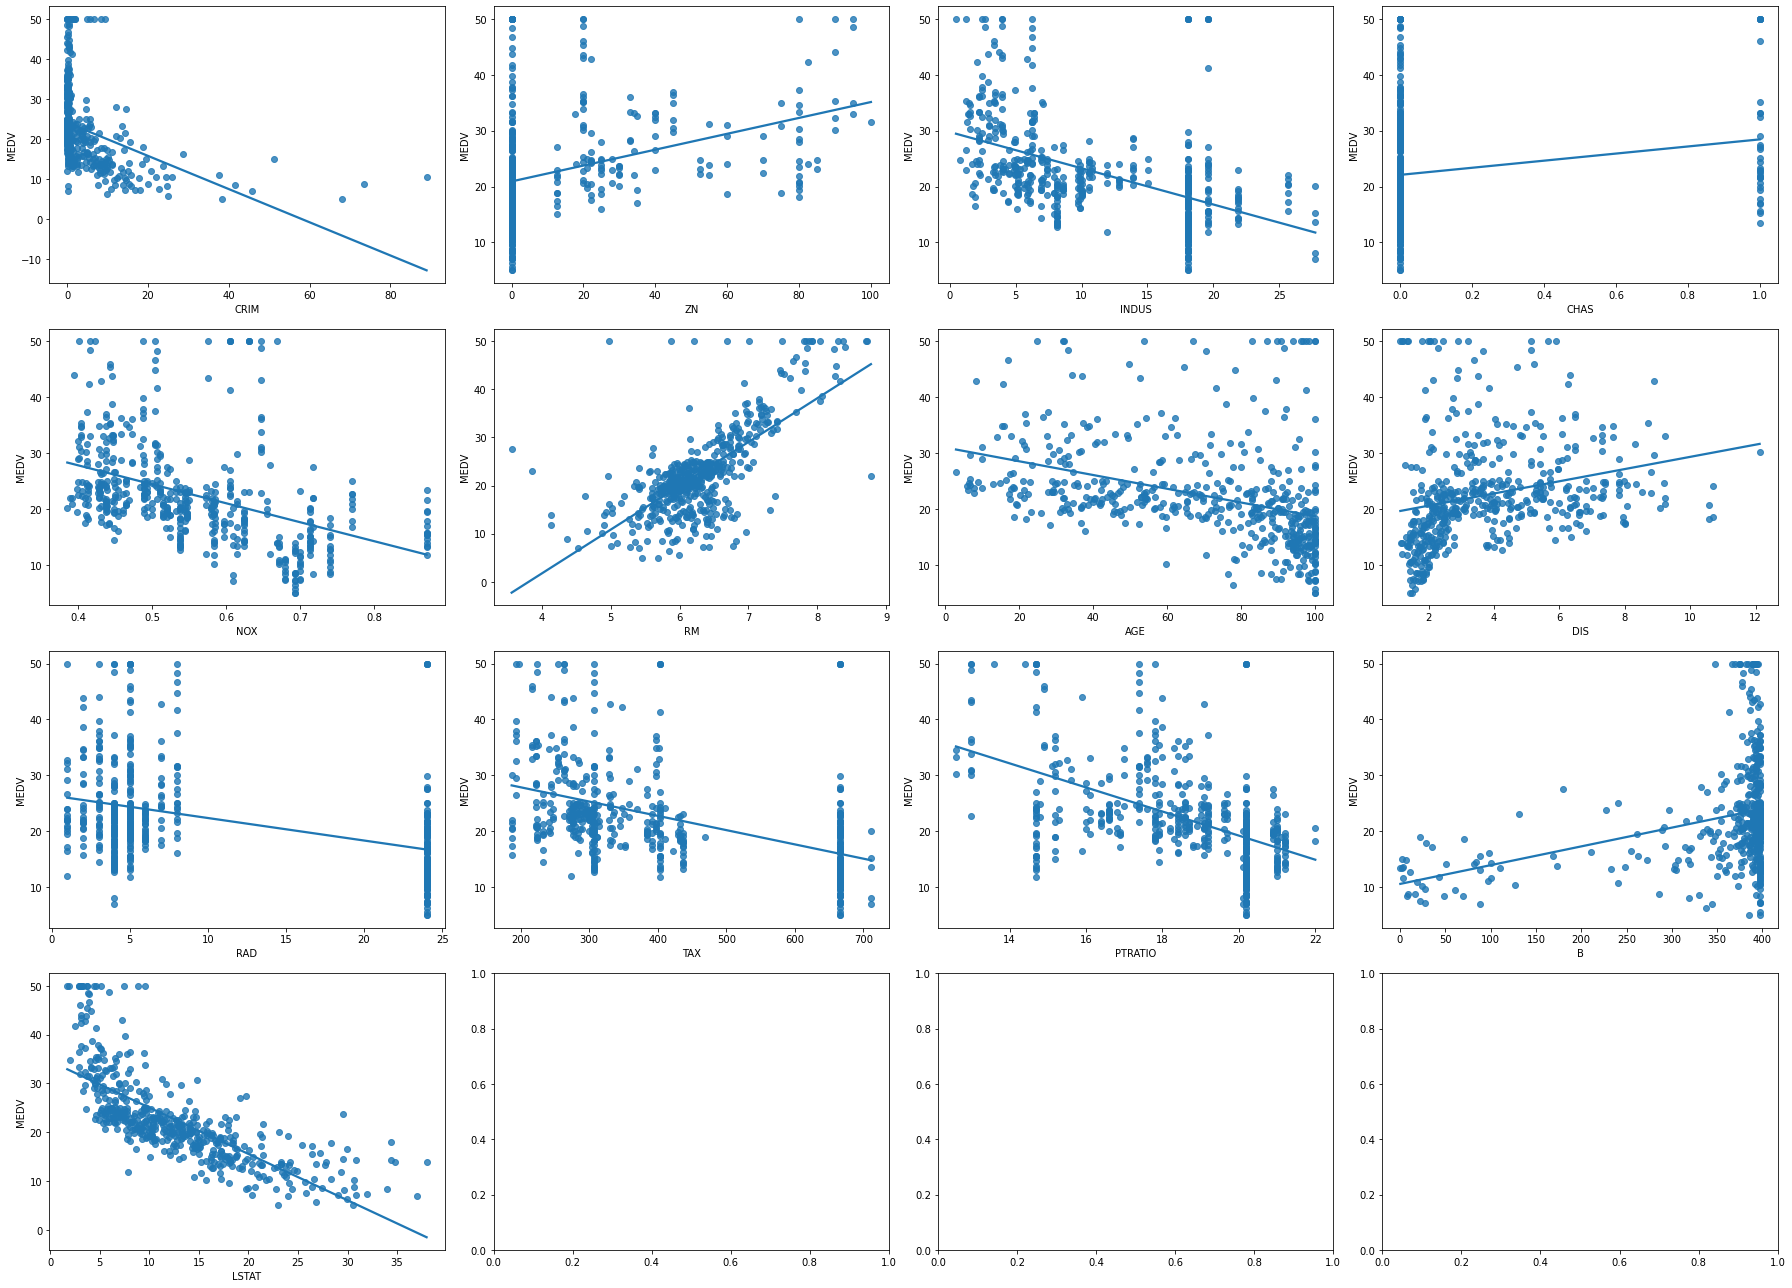

In [19]:
# Regression line for each independent variable against the dependent variable
fig, axs = plt.subplots(4, 4, figsize=(25,18))
index = 0
axs = axs.flatten()

for col in X.columns:
    sns.regplot(x=col, y='MEDV', data=boston_data, ci=None, ax=axs[index])
    index += 1
plt.tight_layout()

## Using `scikit-learn` Linear Regression

### REQUIRED: Pick 3-4 predictors (i.e. CRIM, ZN, etc...) that you will use to predict your target variable, MEDV.
Score and plot your predictions. What do these results tell us?

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [21]:
# Select predictors based on highest correlation
predictors = ['LSTAT', 'RM', 'PTRATIO', 'INDUS']

In [22]:
X = boston_data[predictors]
X.shape

(506, 4)

In [23]:
y = y['MEDV']
y.shape

(506,)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [25]:
# normalise X
sc = StandardScaler()
X_train_norm = sc.fit_transform(X_train)
X_test_norm = sc.transform(X_test)

#### Model 1 - Linear regression

In [26]:
# Instantiate and fit
linreg = LinearRegression()
linreg.fit(X_train_norm, y_train)

print(f"Intercept: {linreg.intercept_}")
print(f"Gradient: {list(zip(predictors, linreg.coef_))}")

Intercept: 22.90791556728232
Gradient: [('LSTAT', -4.2671539872505555), ('RM', 3.441756482823392), ('PTRATIO', -1.9711538240125597), ('INDUS', 0.2144214665397599)]


Interpreting the coefficients:
1. Holding all other features fixed, a 1-unit increase in LSTAT (% lower status of the population) is associated with a median value decrease of \$4247.
1. Holding all other features fixed, a 1-unit increase in RM (average number of rooms per dwelling) is associated with a median value increase of \$3442.
1. Holding all other features fixed, a 1-unit increase in PTRATIO (pupil-teacher ratio by town) is associated with a median value decrease of \$1971.
1. Holding all other features fixed, a 1-unit increase in INDUS (proportion of non-retail business acres per town) is associated with a median value increase of \$214.

In [27]:
y1_pred = linreg.predict(X_test_norm)
rmse1 = np.sqrt(metrics.mean_squared_error(y_test, y1_pred))
print(f"rmse1: {rmse1}")

rmse1: 5.0836238441625445


#### Null model

For the null model, every prediction will be the mean of all the `y1_test` values.

In [28]:
y1_pred_null = np.mean(y_test) * np.ones(len(y_test))

In [29]:
rmse_null = np.sqrt(metrics.mean_squared_error(y_test, y1_pred_null))
print(f"rmse_null: {rmse_null}")

rmse_null: 8.368222251726307


With this, we can conclude that model 1 - Linear regression, does carry some merit.

#### Model 2 - Ridge Regression

In [30]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

In [31]:
# Set up a list of alphas to try.
r_alphas = np.logspace(-3, 3, 100)

# Cross-validate over the list of alphas.
ridge_cv = RidgeCV(alphas=r_alphas, scoring='neg_mean_squared_error', cv=5)

In [32]:
# Fit model
ridge_cv = ridge_cv.fit(X_train_norm, y_train)

print(f"Intercept: {ridge_cv.intercept_}")
print(f"Gradient: {list(zip(predictors, ridge_cv.coef_))}")
print(f"Optimal ridge alpha: {ridge_cv.alpha_}")

Intercept: 22.90791556728232
Gradient: [('LSTAT', -4.106396434518094), ('RM', 3.398220079008903), ('PTRATIO', -1.9403371086233114), ('INDUS', 0.08820726744889805)]
Optimal ridge alpha: 11.497569953977356


Interpreting the coefficients:
1. Holding all other features fixed, a 1-unit increase in LSTAT (% lower status of the population) is associated with a median value decrease of \$4106.
1. Holding all other features fixed, a 1-unit increase in RM (average number of rooms per dwelling) is associated with a median value increase of \$3398.
1. Holding all other features fixed, a 1-unit increase in PTRATIO (pupil-teacher ratio by town) is associated with a median value decrease of \$1940.
1. Holding all other features fixed, a 1-unit increase in INDUS (proportion of non-retail business acres per town) is associated with a median value increase of \$88.

In [33]:
y2_pred = ridge_cv.predict(X_test_norm)
rmse2 = np.sqrt(metrics.mean_squared_error(y_test, y2_pred))
print(f"rmse2: {rmse2}")

rmse2: 5.061181316339516


Model 2 - Ridge regression, performed slightly better than model 1 - Linear regression.

#### Model 3 - ElasticNet Regression

In [34]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

In [35]:
# Set up a list of l1 ratios to try.
l1 = np.arange(0.01, 1, 0.01)

# Set up a list of alphas to try.
e_alphas = np.logspace(-3, 3, 100)

# Cross-validate over the list of alphas.
enet_cv = ElasticNetCV(l1_ratio=l1, alphas=r_alphas, cv=5)

In [36]:
# Fit model
enet_cv = enet_cv.fit(X_train_norm, y_train)

print(f"Intercept: {enet_cv.intercept_}")
print(f"Gradient: {list(zip(predictors, enet_cv.coef_))}")
print(f"Optimal elasticnet alpha: {enet_cv.alpha_}")
print(f"Optimal elasticnet l1: {enet_cv.l1_ratio_}")

Intercept: 22.90791556728232
Gradient: [('LSTAT', -4.072289020308001), ('RM', 3.3874235999598774), ('PTRATIO', -1.9332125222400218), ('INDUS', 0.06117309937338231)]
Optimal elasticnet alpha: 0.037649358067924674
Optimal elasticnet l1: 0.01


Interpreting the coefficients:
1. Holding all other features fixed, a 1-unit increase in LSTAT (% lower status of the population) is associated with a median value decrease of \$4072.
1. Holding all other features fixed, a 1-unit increase in RM (average number of rooms per dwelling) is associated with a median value increase of \$3387.
1. Holding all other features fixed, a 1-unit increase in PTRATIO (pupil-teacher ratio by town) is associated with a median value decrease of \$1933.
1. Holding all other features fixed, a 1-unit increase in INDUS (proportion of non-retail business acres per town) is associated with a median value increase of \$38.

In [37]:
y3_pred = enet_cv.predict(X_test_norm)
rmse3 = np.sqrt(metrics.mean_squared_error(y_test, y3_pred))
print(f"rmse3: {rmse3}")

rmse3: 5.056839525192334


Model 3 - Elasticnet regression, performed slightly better than model 2 - Ridge regression.

### REQUIRED: Try 70/30 and 90/10 train/test splits: 70% of the data for training - 30% for testing, then 90% for training - 10% for testing.
Score and plot both of these approaches. How do your metrics change? What does this tell us about the size of training/testing splits? Include a written response.

Since the Elasticnet regression model performed the best, we will use that model

In [38]:
# predictors = ['LSTAT', 'RM', 'PTRATIO', 'INDUS']
# X = boston_data[predictors]
# y = y['MEDV']

for train in [0.70, 0.90]:
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train, random_state=42)

    sc = StandardScaler()
    X_train_norm = sc.fit_transform(X_train)
    X_test_norm = sc.transform(X_test)
    
    elastic = ElasticNet(alpha=0.03765, l1_ratio=0.01).fit(X_train_norm, y_train)
    
    y_pred = elastic.predict(X_test_norm)
    
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    
    print(f"Training split of {train} resulted in RMSE of {rmse}")

Training split of 0.7 resulted in RMSE of 5.098574122221581
Training split of 0.9 resulted in RMSE of 3.9740005479236684


Note: Previously for a training split of 0.75, the RMSE was 5.05.

A smaller training data resulted in a larger error, possibly due to insufficient training. Conversely, a larger training data resulted in a smaller error due to more training done.

## BONUS: Try the k-fold cross-validation technique described above, varying the number of folds from 5 to 10
What seems optimal? How do your scores change? What is the variance like? Try different folds to get a sense of how this impacts your score. What are the tradeoffs associated with choosing the number of folds? Include a written response.

In [39]:
from sklearn import model_selection

In [40]:
for folds in range(5, 11):
    rmse_values = []
    scores = []
    n = 0

    kf = model_selection.KFold(n_splits=folds)
    
    for train_index, test_index in kf.split(X, y):

        X_train = X.iloc[train_index]
        y_train = y.iloc[train_index]

        X_test = X.iloc[test_index]
        y_test = y.iloc[test_index]

#         sc = StandardScaler()
#         X_train_norm = sc.fit_transform(X_train)
#         X_test_norm = sc.transform(X_test)

        elastic = ElasticNet(alpha=0.03765, l1_ratio=0.01).fit(X_train, y_train)
        y_pred = elastic.predict(X_test)

        rmse_values.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
        scores.append(elastic.score(X, y))

        n += 1

#         print(f"Model {n}")
#         print(f"RMSE: {rmse_values[n-1]}")
#         print(f"R2: {scores[n-1]}\n")


    print(f"~~~~ SUMMARY OF {folds} folds CROSS VALIDATION ~~~~")
    print(f"Mean of RMSE for all folds: {np.mean(rmse_values)}")
    print(f"Variance of RMSE across all folds: {np.var(rmse_values)}")
    print(f"Mean of R2 for all folds: {np.mean(scores)}\n")

~~~~ SUMMARY OF 5 folds CROSS VALIDATION ~~~~
Mean of RMSE for all folds: 5.65143907010196
Variance of RMSE across all folds: 2.805459405942652
Mean of R2 for all folds: 0.6675576690307532

~~~~ SUMMARY OF 6 folds CROSS VALIDATION ~~~~
Mean of RMSE for all folds: 5.4700841488818455
Variance of RMSE across all folds: 4.887890986363487
Mean of R2 for all folds: 0.669835890527882

~~~~ SUMMARY OF 7 folds CROSS VALIDATION ~~~~
Mean of RMSE for all folds: 5.387785203516056
Variance of RMSE across all folds: 6.664425064401412
Mean of R2 for all folds: 0.6701071294280597

~~~~ SUMMARY OF 8 folds CROSS VALIDATION ~~~~
Mean of RMSE for all folds: 5.2878151727372265
Variance of RMSE across all folds: 4.472881756919872
Mean of R2 for all folds: 0.6737508158762278

~~~~ SUMMARY OF 9 folds CROSS VALIDATION ~~~~
Mean of RMSE for all folds: 5.289386974278476
Variance of RMSE across all folds: 5.309508443198272
Mean of R2 for all folds: 0.6736407714988852

~~~~ SUMMARY OF 10 folds CROSS VALIDATION ~~~

8 folds seem to be the most optimal in this range due to the lower mean and variance of RMSE.

As the number of fold increases, RMSE drops indicating that the bias has decreased. This is not surprising since more folds means more data to train on.

However, as it has trained on more data, it becomes harder for the model to generalise on data it has never seen before, hence we see that the variance generally increases as the number of fold increases.

## BONUS
Practice the same workflow you just worked through above, but this time use Statsmodels instead of Sklearn for linear regression. See example formulas below.

### Example: Statsmodels Formulas

Adjust the formula using your chosen metrics from the housing data. Remember, your workflow here is the same, but the syntax is a little different. Describe your results. Are they comparable to scikit-learn's regression models?

In [8]:
# First, format your data in a DataFrame

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
# Set up your new statsmodel.formula handling model
import statsmodels.formula.api as smf

# You can easily swap these out to test multiple versions/different formulas
formulas = {
    "case1": "MEDV ~ RM + LSTAT + RAD + TAX + NOX + INDUS + CRIM + ZN - 1", # - 1 = remove intercept
    "case2": "MEDV ~ NOX + RM",
    "case3": "MEDV ~ RAD + TAX"
}

model = smf.ols(formula=formulas['case1'], data=df)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     1220.
Date:                Wed, 29 Nov 2017   Prob (F-statistic):          1.59e-321
Time:                        22:28:38   Log-Likelihood:                -1567.7
No. Observations:                 506   AIC:                             3151.
Df Residuals:                     498   BIC:                             3185.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             4.9744      0.224     22.197      0.000       4.534       5.415
LSTAT         -0.5615      0.048    -11.817      0.000      -0.655      -0.468
RAD            0.2109      0.070      3.025      0.003       0.074       0.348
TAX           -0.0174      0.004     -4.267      0.000      -0.025      -0.009
NOX            4.3456      3.385      1.284      0.200      -2.305      10.997
INDUS          0.0925      0.067      1.385      0.167      -0.039       0.224
CRIM          -0.0866      0.037     -2.362      0.019      -0.159      -0.015
ZN             0.0288      0.013      2.215      0.027       0.003       0.054
==============================================================================
Omnibus:                      192.072   Durbin-Watson:                   0.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              831.634
Skew:                           1.665   Prob(JB):                    2.59e-181
Kurtosis:                       8.325   Cond. No.                     6.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### BONUS:

Can you optimize your R2, selecting the best features? Provide your code and explain your process in a brief written response.

### BONUS:

Given a combination of predictors, can you identify another response variable that could be accurately predicted through the exploration of different predictors in this data set?

_Tip: Consider pairplots, coefficients, or Pearson scores._

In [10]:
# Check out variable relations
import seaborn as sns

sns.pairplot(X);

In [ ]:
# Check out Pearson scores


## BONUS/DEMO: Up for an additional challenge? Try again, this time using the `patsy` library.

In [11]:
import patsy

# Add response to the core DataFrame
df['MEDV'] = y

In [12]:
from sklearn.model_selection import train_test_split  #Note: if you didn't import this earlier, you'll need to do so now

# Easily change your variable predictors without reslicing your DataFrame
y, X = patsy.dmatrices("MEDV ~ AGE + RM", data=df, return_type="dataframe")

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)


In [13]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Rerun your model, iteratively changing your variables and train_size from the previous cell

lm = LinearRegression()
model = lm.fit(X_train, y_train)

predictions = model.predict(X_test)
print("R^2 Score: {}".format(metrics.r2_score(y_test, predictions)))

R^2 Score: 0.5043486813354807
